### Step 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


### Step 2

In [2]:
df = pd.read_csv('Ecommerce_marketing_campaign.csv')

In [3]:
df['Year'] = 2024
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntA,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,0,3,11,1,2024
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,0,3,11,0,2024
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,3,11,0,2024
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,0,3,11,0,2024
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,3,11,0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,...,0,0,0,0,0,0,3,11,0,2024
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,...,0,0,0,1,0,0,3,11,0,2024
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,...,0,1,0,0,0,0,3,11,0,2024
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,...,0,0,0,0,0,0,3,11,0,2024


In [4]:
df['Age'] = df['Year'] - df['Year_Birth']

In [5]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntA                   False
MntB                   False
MntC                   False
MntD                   False
MntE                   False
MntF                   False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
Year                   False
Age                    False
dtype: bool

In [6]:
df1 = df.dropna()

In [7]:
df1.count()

ID                     2216
Year_Birth             2216
Education              2216
Marital_Status         2216
Income                 2216
Kidhome                2216
Teenhome               2216
Dt_Customer            2216
Recency                2216
MntA                   2216
MntB                   2216
MntC                   2216
MntD                   2216
MntE                   2216
MntF                   2216
NumDealsPurchases      2216
NumWebPurchases        2216
NumCatalogPurchases    2216
NumStorePurchases      2216
NumWebVisitsMonth      2216
AcceptedCmp3           2216
AcceptedCmp4           2216
AcceptedCmp5           2216
AcceptedCmp1           2216
AcceptedCmp2           2216
Complain               2216
Z_CostContact          2216
Z_Revenue              2216
Response               2216
Year                   2216
Age                    2216
dtype: int64

In [8]:
for col in list(df1.columns):
    print(df1[col].value_counts())
    print(' ')

5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64
 
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1977    52
1952    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1982    44
1963    44
1962    44
1967    44
1951    42
1983    41
1986    41
1957    41
1964    41
1980    39
1981    38
1984    38
1961    35
1953    35
1985    32
1949    30
1989    29
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64
 
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
 
Married     857
Together    573
Single    

### Step 3

In [9]:
def parse_date(value):
    try:
        return pd.to_datetime(value, format='%m/%d/%Y').year
    except ValueError:
        return int(value)

In [10]:
df2 = df1.copy()
df2.loc[:,'CustomerSinceYear'] = df2['Dt_Customer'].apply(parse_date)

In [11]:
df2['YearsAsCustomer'] = 2024 - df2['CustomerSinceYear']

In [75]:
df3 = df2.drop(columns=['ID','Dt_Customer','Year_Birth','Year','CustomerSinceYear'])
df3.head(50)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,YearsAsCustomer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,67,12
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,70,10
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,59,11
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,40,10
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,43,10
5,Master,Together,62513.0,0,1,16,520,42,98,0,...,0,0,0,0,0,3,11,0,57,11
6,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,...,0,0,0,0,0,3,11,0,53,12
7,PhD,Married,33454.0,1,0,32,76,10,56,3,...,0,0,0,0,0,3,11,0,39,11
8,PhD,Together,30351.0,1,0,19,14,0,24,3,...,0,0,0,0,0,3,11,1,50,11
9,PhD,Together,5648.0,1,1,68,28,0,6,1,...,0,0,0,0,0,3,11,0,74,10


In [13]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntA,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntB,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntC,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntD,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntE,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntF,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


In [14]:
df3.groupby('Response').mean().transpose()

Response,0,1
Income,50839.132767,60209.675676
Kidhome,0.459373,0.342342
Teenhome,0.540627,0.306306
Recency,51.443972,35.264264
MntA,270.160382,502.615616
MntB,24.307488,37.939940
MntC,144.577270,293.765766
MntD,35.148168,51.714715
MntE,25.022836,38.372372
MntF,40.908125,61.252252


<AxesSubplot:xlabel='Response', ylabel='Age'>

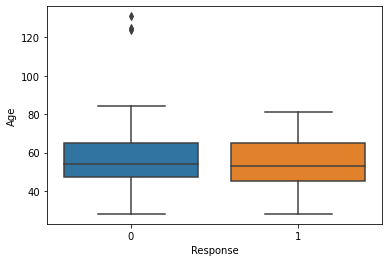

In [15]:
sns.boxplot(data = df3, x='Response',y='Age')

In [16]:
df3.sort_values(by='Age', ascending=False,)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,YearsAsCustomer
239,2n Cycle,Single,60182.0,0,1,23,8,0,5,7,...,0,0,0,0,0,3,11,0,131,10
339,PhD,Together,83532.0,0,0,36,755,144,562,104,...,0,1,0,0,0,3,11,0,125,11
192,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,...,0,0,0,0,1,3,11,0,124,11
1950,PhD,Single,51141.0,0,0,96,144,0,7,0,...,0,0,0,0,0,3,11,0,84,11
424,PhD,Married,93027.0,0,0,77,1285,42,716,55,...,0,1,0,0,0,3,11,0,83,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,Graduation,Single,71163.0,0,0,30,283,17,372,138,...,0,0,0,0,0,3,11,0,29,10
2213,2n Cycle,Single,80617.0,0,0,42,594,51,631,72,...,0,0,0,0,0,3,11,0,29,12
1850,2n Cycle,Single,83257.0,0,0,56,536,27,590,38,...,0,1,0,0,1,3,11,1,29,12
1170,Basic,Married,14421.0,0,0,81,0,0,2,3,...,0,0,0,0,0,3,11,0,28,10


In [17]:
df4 = df3[df3['Age'] <= 90]

<AxesSubplot:xlabel='Response', ylabel='Age'>

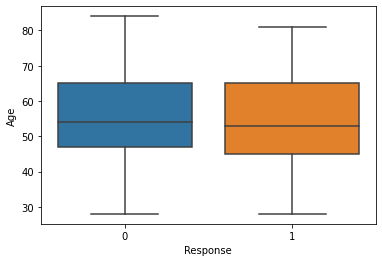

In [18]:
sns.boxplot(data = df4, x='Response',y='Age')

<AxesSubplot:xlabel='Response', ylabel='count'>

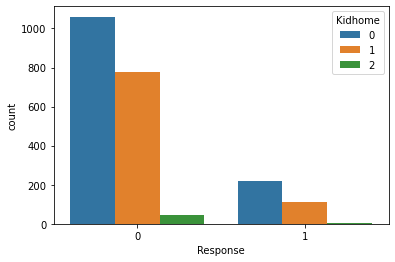

In [19]:
sns.countplot(data=df4,x='Response', hue='Kidhome')

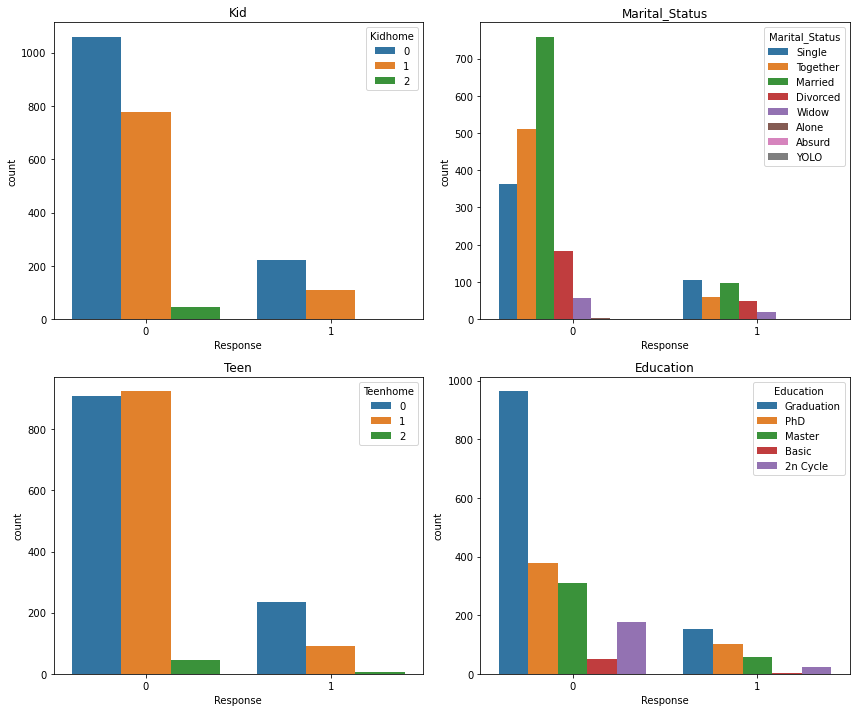

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1
sns.countplot(data=df4, x='Response',hue='Kidhome', ax=axes[0, 0])
axes[0, 0].set_title('Kid')

# plot 2
sns.countplot(data=df4,x='Response', hue='Marital_Status', ax=axes[0, 1])
axes[0, 1].set_title('Marital_Status')

# plot 3
sns.countplot(data=df4, x='Response',hue='Teenhome', ax=axes[1, 0])
axes[1, 0].set_title('Teen')

# plot 4
sns.countplot(data=df4,x='Response' ,hue='Education', ax=axes[1, 1])
axes[1, 1].set_title('Education')

plt.tight_layout()
plt.show()

In [21]:
df4.sort_values(by='Income', ascending=False,)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,YearsAsCustomer
2233,Graduation,Together,666666.0,1,0,23,9,14,18,8,...,0,0,0,0,0,3,11,0,47,11
617,PhD,Together,162397.0,1,1,31,85,1,16,2,...,0,0,0,0,0,3,11,0,48,11
687,PhD,Married,160803.0,0,0,21,55,16,1622,17,...,0,0,0,0,0,3,11,0,42,12
1300,Master,Together,157733.0,1,0,37,39,1,9,2,...,0,0,0,0,0,3,11,0,53,11
164,PhD,Married,157243.0,0,1,98,20,2,1582,1,...,0,0,0,0,0,3,11,0,51,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,Graduation,Married,4428.0,0,1,0,16,4,12,2,...,0,0,0,0,0,3,11,0,55,11
1846,PhD,Married,4023.0,1,1,29,5,0,1,1,...,0,0,0,0,0,3,11,0,61,10
1524,Graduation,Single,3502.0,1,0,56,2,1,1,0,...,0,0,0,0,0,3,11,0,51,11
21,Graduation,Married,2447.0,1,0,42,1,1,1725,1,...,0,0,0,0,0,3,11,0,45,11


In [22]:
i = df4[((df4.Income == 666666))]
i

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,YearsAsCustomer
2233,Graduation,Together,666666.0,1,0,23,9,14,18,8,...,0,0,0,0,0,3,11,0,47,11


In [23]:
df_final = df4.drop(2233)

In [24]:
df_final.sort_values(by='Income', ascending=False,).head(20)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,YearsAsCustomer
617,PhD,Together,162397.0,1,1,31,85,1,16,2,...,0,0,0,0,0,3,11,0,48,11
687,PhD,Married,160803.0,0,0,21,55,16,1622,17,...,0,0,0,0,0,3,11,0,42,12
1300,Master,Together,157733.0,1,0,37,39,1,9,2,...,0,0,0,0,0,3,11,0,53,11
164,PhD,Married,157243.0,0,1,98,20,2,1582,1,...,0,0,0,0,0,3,11,0,51,10
1653,Graduation,Together,157146.0,0,0,13,1,0,1725,2,...,0,0,0,0,0,3,11,0,47,11
2132,PhD,Married,156924.0,0,0,85,2,1,2,1,...,0,0,0,0,0,3,11,0,75,11
655,Graduation,Divorced,153924.0,0,0,81,1,1,1,1,...,0,0,0,0,0,3,11,0,49,10
1898,PhD,Single,113734.0,0,0,9,6,2,3,1,...,0,0,0,0,0,3,11,0,79,10
646,Graduation,Together,105471.0,0,0,36,1009,181,104,202,...,0,1,1,0,0,3,11,1,54,11
252,Graduation,Divorced,102692.0,0,0,5,168,148,444,32,...,1,1,1,1,0,3,11,1,50,11


<AxesSubplot:xlabel='Response', ylabel='Income'>

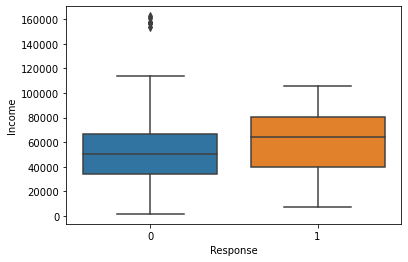

In [25]:
sns.boxplot(data=df_final, y='Income', x='Response')

### Step 4

#### 4.1 Data Processing

In [26]:
df_final.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,YearsAsCustomer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,67,12
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,70,10
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,59,11
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,40,10
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,43,10


In [27]:
list(df_final)

['Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntA',
 'MntB',
 'MntC',
 'MntD',
 'MntE',
 'MntF',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'YearsAsCustomer']

In [28]:
columns_to_encode = ['Education','Marital_Status']

In [29]:
df_ML = pd.get_dummies(df_final, columns=columns_to_encode, drop_first=False)

In [30]:
df_ML.head()

,Income,Kidhome,Teenhome,Recency,MntA,MntB,MntC,MntD,MntE,MntF,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,0,1,0,0,0,0


In [31]:
list(df_ML)

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntA',
 'MntB',
 'MntC',
 'MntD',
 'MntE',
 'MntF',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'YearsAsCustomer',
 'Education_2n Cycle',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO']

In [32]:
df_MLfinal = df_ML.drop(columns=['Z_CostContact','Z_Revenue'])

In [33]:
df_MLfinal.count()

Income                     2212
Kidhome                    2212
Teenhome                   2212
Recency                    2212
MntA                       2212
MntB                       2212
MntC                       2212
MntD                       2212
MntE                       2212
MntF                       2212
NumDealsPurchases          2212
NumWebPurchases            2212
NumCatalogPurchases        2212
NumStorePurchases          2212
NumWebVisitsMonth          2212
AcceptedCmp3               2212
AcceptedCmp4               2212
AcceptedCmp5               2212
AcceptedCmp1               2212
AcceptedCmp2               2212
Complain                   2212
Response                   2212
Age                        2212
YearsAsCustomer            2212
Education_2n Cycle         2212
Education_Basic            2212
Education_Graduation       2212
Education_Master           2212
Education_PhD              2212
Marital_Status_Absurd      2212
Marital_Status_Alone       2212
Marital_

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = df_MLfinal.drop(columns=['Response'])
y = df_MLfinal['Response']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=42)

In [38]:
X_test.count()

Income                     664
Kidhome                    664
Teenhome                   664
Recency                    664
MntA                       664
MntB                       664
MntC                       664
MntD                       664
MntE                       664
MntF                       664
NumDealsPurchases          664
NumWebPurchases            664
NumCatalogPurchases        664
NumStorePurchases          664
NumWebVisitsMonth          664
AcceptedCmp3               664
AcceptedCmp4               664
AcceptedCmp5               664
AcceptedCmp1               664
AcceptedCmp2               664
Complain                   664
Age                        664
YearsAsCustomer            664
Education_2n Cycle         664
Education_Basic            664
Education_Graduation       664
Education_Master           664
Education_PhD              664
Marital_Status_Absurd      664
Marital_Status_Alone       664
Marital_Status_Divorced    664
Marital_Status_Married     664
Marital_

#### Build Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf = RandomForestClassifier(max_depth=5, random_state=42)

In [41]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [42]:
clf

RandomForestClassifier(max_depth=5, random_state=42)

#### Predict model

In [43]:
y_predict = clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_curve, auc

In [45]:
accuracy_score(y_test, y_predict)

0.8539156626506024

In [46]:
confusion_matrix(y_test, y_predict)

array([[549,   4],
       [ 93,  18]], dtype=int64)

In [47]:
precision_score(y_test, y_predict)

0.8181818181818182

In [48]:
# AUC
y_prob = clf.predict_proba(X_test)
y_prob

array([[0.89805109, 0.10194891],
       [0.93417008, 0.06582992],
       [0.92934367, 0.07065633],
       ...,
       [0.92909027, 0.07090973],
       [0.92692919, 0.07307081],
       [0.94175616, 0.05824384]])

In [49]:
pred = y_prob[:,1]
pred

array([0.10194891, 0.06582992, 0.07065633, 0.07416873, 0.10357803,
       0.03915497, 0.3271932 , 0.41290589, 0.07232817, 0.18874119,
       0.08038585, 0.14452018, 0.27692203, 0.11020148, 0.10586048,
       0.08637207, 0.4414616 , 0.06721246, 0.15369868, 0.07107995,
       0.0678837 , 0.04604563, 0.0580939 , 0.07796033, 0.2124411 ,
       0.20489106, 0.34995737, 0.05614424, 0.2121202 , 0.06278384,
       0.0950039 , 0.07400883, 0.25193533, 0.15086771, 0.16896861,
       0.08064267, 0.03338841, 0.06384443, 0.13589514, 0.16345166,
       0.0834926 , 0.05721233, 0.18413739, 0.06634977, 0.13236824,
       0.31179987, 0.11988561, 0.05552644, 0.14863448, 0.06535841,
       0.06071113, 0.0593526 , 0.11316099, 0.11841136, 0.13539583,
       0.07330787, 0.23331029, 0.0895291 , 0.11400748, 0.19421542,
       0.12508635, 0.0818222 , 0.18271764, 0.1269301 , 0.16686317,
       0.02985779, 0.12498777, 0.113352  , 0.04827049, 0.31412534,
       0.06912201, 0.5794796 , 0.02937097, 0.27967426, 0.14178

In [50]:
Y = y_test
pred = y_prob[:,1]
fpr, tpr, thresholds = roc_curve(Y, pred)
roc_auc_lrl = auc(fpr, tpr)

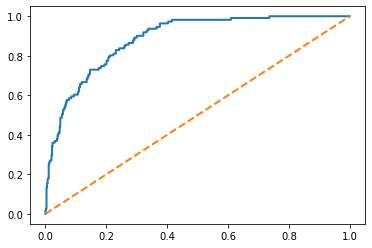

In [51]:
plt.plot(fpr, tpr, lw=2)
plt.plot([0,1],[0,1], lw=2, linestyle='--')

In [52]:
roc_auc_lrl

0.8852043725461447

#### Additional task 

In [53]:
auc_scores = []

In [54]:
for max_depth in range(3, 16):
    # Initialize the RandomForestClassifier with the current max_depth
    clfloop = RandomForestClassifier(max_depth=max_depth, random_state=42)

    # Train the model on the training data
    clfloop.fit(X_train, y_train)

    # Predict probabilities on the test set
    y_probloop = clfloop.predict_proba(X_test)

    # Extract the predicted probabilities for the positive class (class 1)
    predloop = y_probloop[:, 1]

    # Calculate the ROC curve
    fprl, tprl, thresholdsl = roc_curve(y_test, predloop)

    # Calculate the AUC (Area Under the Curve)
    roc_auc_loop = auc(fprl, tprl)

    # Store the AUC score in the list
    auc_scores.append(roc_auc_loop)

    # Print the current max_depth and AUC
    print(f"max_depth={max_depth}, AUC={roc_auc_loop:.4f}")


max_depth=3, AUC=0.8581
max_depth=4, AUC=0.8718
max_depth=5, AUC=0.8852
max_depth=6, AUC=0.8984
max_depth=7, AUC=0.8933
max_depth=8, AUC=0.8977
max_depth=9, AUC=0.9006
max_depth=10, AUC=0.8973
max_depth=11, AUC=0.8994
max_depth=12, AUC=0.9002
max_depth=13, AUC=0.8874
max_depth=14, AUC=0.8908
max_depth=15, AUC=0.8875


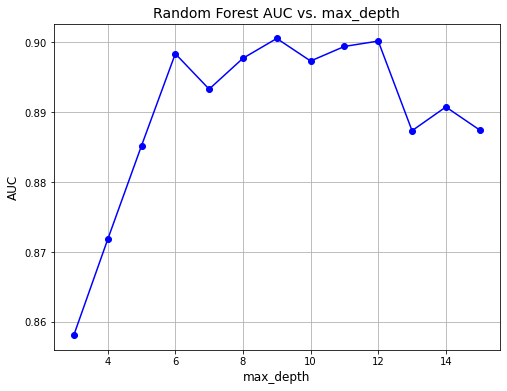

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(range(3, 16), auc_scores, marker='o', linestyle='-', color='b')
plt.title("Random Forest AUC vs. max_depth", fontsize=14)
plt.xlabel("max_depth", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.grid(True)
plt.show()

#### Choosing the best max depth = 9

In [56]:
clfbest = RandomForestClassifier(max_depth=9, random_state=42)

In [57]:
clfbest.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, random_state=42)

In [58]:
ybest_predict = clfbest.predict(X_test)

In [59]:
accuracy_score(y_test, ybest_predict)

0.8629518072289156

In [121]:
cmrf = confusion_matrix(y_test, ybest_predict)
cmrf

array([[545,   8],
       [ 83,  28]], dtype=int64)

In [61]:
precision_score(y_test, ybest_predict)

0.7777777777777778

In [62]:
ybest_prob = clfbest.predict_proba(X_test)
ybest_prob

array([[0.89323178, 0.10676822],
       [0.9386487 , 0.0613513 ],
       [0.98003726, 0.01996274],
       ...,
       [0.94361393, 0.05638607],
       [0.95824968, 0.04175032],
       [0.96389402, 0.03610598]])

In [63]:
predbest = ybest_prob[:,1]
predbest

array([0.10676822, 0.0613513 , 0.01996274, 0.0313504 , 0.10438505,
       0.00967646, 0.43118792, 0.490556  , 0.04669351, 0.19107165,
       0.05581279, 0.155173  , 0.11681536, 0.035114  , 0.09779813,
       0.07417116, 0.4344106 , 0.03077354, 0.12776224, 0.04518391,
       0.03112762, 0.01181098, 0.09422437, 0.03405276, 0.31695427,
       0.1740198 , 0.52231566, 0.02708704, 0.24114861, 0.03391106,
       0.11043102, 0.03256005, 0.27309571, 0.18054233, 0.24139988,
       0.14819021, 0.00804114, 0.02633758, 0.14326818, 0.24279089,
       0.05038584, 0.02510542, 0.25900668, 0.03099102, 0.25657946,
       0.37020535, 0.11126468, 0.04130538, 0.1097084 , 0.02039318,
       0.02195806, 0.02734396, 0.04972867, 0.14079176, 0.14047384,
       0.01847501, 0.23069179, 0.04101683, 0.13520236, 0.19081566,
       0.0918672 , 0.06829081, 0.14492284, 0.11449735, 0.09197985,
       0.00716533, 0.09358937, 0.10574955, 0.02185328, 0.36229242,
       0.02756362, 0.65807626, 0.00438362, 0.30999489, 0.21633

In [64]:
fprbest, tprbest, thresholdsbest = roc_curve(Y, predbest)
roc_auc_lrlbest = auc(fprbest, tprbest)

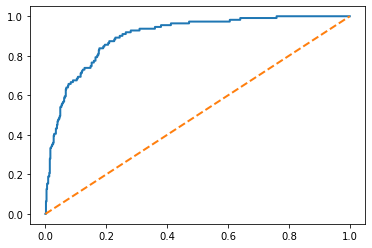

In [65]:
plt.plot(fprbest, tprbest, lw=2)
plt.plot([0,1],[0,1], lw=2, linestyle='--')

In [66]:
roc_auc_lrlbest

0.9005506410569702

In [112]:
from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(y_test, predbest)
mse_rf

0.09264573836719414

Top Features:
         Feature  Importance
3        Recency    0.085913
6           MntC    0.077508
0         Income    0.076088
4           MntA    0.071943
18  AcceptedCmp1    0.054686


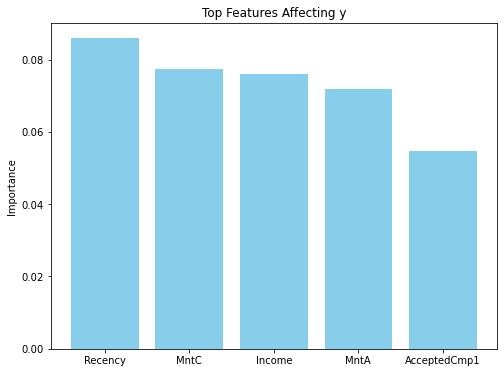

In [74]:
feature_importances = clfbest.feature_importances_
features = x.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 5 features
print("Top Features:")
print(importance_df.head(5))

# Plot the top 5 features
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'][:5], importance_df['Importance'][:5], color='skyblue')
plt.title("Top Features Affecting y")
plt.ylabel("Importance")
plt.show()

In [77]:
print(y_train.dtype)

int64


In [81]:
Y = y_train.astype('category')

In [84]:
class_names = Y.cat.categories.astype('str')
print("Class names:", class_names)

Class names: Index(['0', '1'], dtype='object')


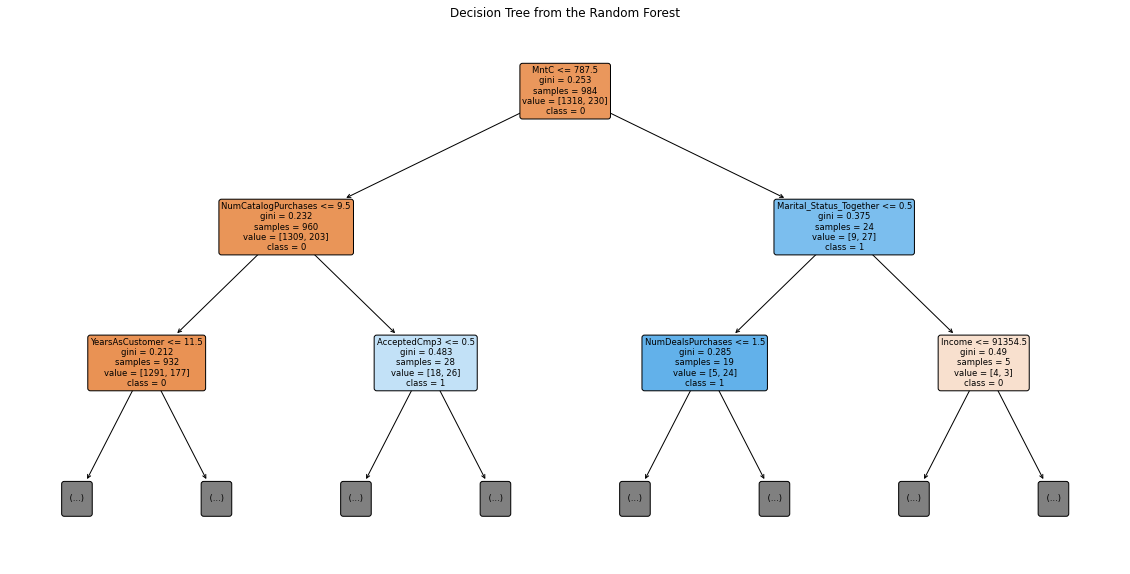

In [88]:
from sklearn.tree import plot_tree

# Select one tree from the Random Forest (e.g., the first tree)
tree_to_plot = clfbest.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree_to_plot, 
    feature_names=x.columns, 
    class_names=class_names,  
    rounded=True,
    filled=True,
    max_depth=2
)
plt.title("Decision Tree from the Random Forest")
plt.show()

#### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [98]:
y_predlog = model.predict(X_test_scaled)

In [100]:
accuracy_score(y_test, y_predlog)

0.8780120481927711

In [120]:
cmlog = confusion_matrix(y_test, y_predlog)
cmlog

array([[531,  22],
       [ 59,  52]], dtype=int64)

In [103]:
class_report = classification_report(y_test, y_predlog)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       553
           1       0.70      0.47      0.56       111

    accuracy                           0.88       664
   macro avg       0.80      0.71      0.75       664
weighted avg       0.87      0.88      0.87       664



In [104]:
y_problog = model.predict_proba(X_test_scaled)[:, 1] 

In [105]:
fprlog, tprlog, thresholdslog = roc_curve(y_test, y_problog)

In [107]:
roc_auc_lrllog = auc(fprlog, tprlog)

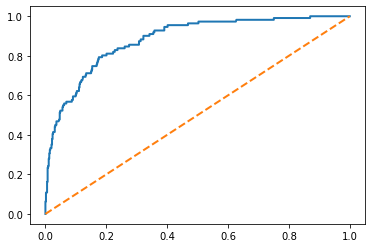

In [108]:
plt.plot(fprlog, tprlog, lw=2)
plt.plot([0,1],[0,1], lw=2, linestyle='--')

In [109]:
roc_auc_lrllog

0.8821905087727873

In [114]:
mse_logreg = mean_squared_error(y_test, y_predlog)
mse_logreg

0.12198795180722892

In [115]:
coef = model.coef_[0]

In [117]:
featureslog = X_train.columns
coeff_df = pd.DataFrame({
    'Feature': featureslog,
    'Coefficient': coef
})

In [119]:
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Absolute Coefficient', ascending=False)
coeff_df

,Feature,Coefficient,Absolute Coefficient
3,Recency,-0.864214,0.864214
22,YearsAsCustomer,0.716516,0.716516
15,AcceptedCmp3,0.524049,0.524049
13,NumStorePurchases,-0.512265,0.512265
2,Teenhome,-0.510902,0.510902
6,MntC,0.494115,0.494115
17,AcceptedCmp5,0.478776,0.478776
32,Marital_Status_Single,0.374787,0.374787
11,NumWebPurchases,0.374308,0.374308
27,Education_PhD,0.362060,0.362060


#### Findings

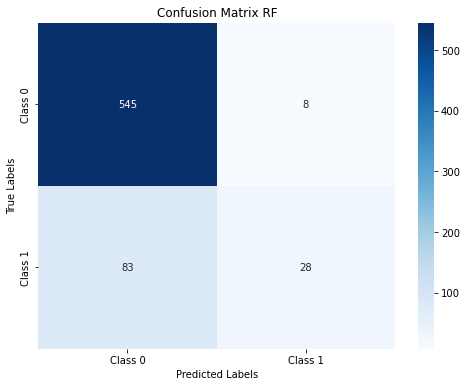

In [122]:
# Confusion matrix for RF
plt.figure(figsize=(8, 6))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

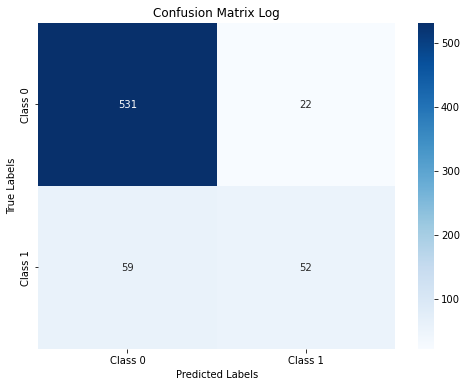

In [123]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmlog, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Log')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [126]:
metrics_df = pd.DataFrame({
    'AUC': [roc_auc_lrllog, roc_auc_lrlbest],
    'MSE': [mse_logreg, mse_rf]
}, index=['Logistic Regression', 'Random Forest'])
metrics_df

,AUC,MSE
Logistic Regression,0.882191,0.121988
Random Forest,0.900551,0.092646
